In [1]:
%load_ext autoreload
%matplotlib inline

import logging
import sys

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

import hyperhyper as hy
import dataset

/root/anaconda3/envs/hy/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
%load_ext autoreload

import dataset
import numpy as np
# import pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import DecisionTreeRegressor, export_graphviz

import hyperhyper as hy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
bunch = hy.Bunch(f'/mnt/data/bunches/all2')

In [4]:
best = bunch.results()[0]

In [5]:
sam = best['pair_args__subsample_factor']
decay = best['pair_args__decay_rate']
neg = best['neg']
eig = best['eig']

In [6]:
kv, res = bunch.svd(impl='scipy', keyed_vector=True, pair_args={'subsample': 'deter', 'subsample_factor': sam, 'delete_oov': True, 'window': 10, 'decay_rate': decay, 'dynamic_window': 'decay'}, low_memory=True, neg=neg, eig=eig, dim=500)

svd
k pair_args


In [11]:
len(kv.vocab)

100000

In [14]:
kv.init_sims()

In [16]:
kv.save('/root/all_100k.model')

In [7]:
res

{'micro': 0.5820791264949444,
 'macro': 0.6550916007372402,
 'results': [{'name': 'de_schm280',
   'score': 0.7248024651945882,
   'oov': 0.05,
   'fullscore': 0.6885623419348588},
  {'name': 'de_gur65',
   'score': 0.7671674810791987,
   'oov': 0.03076923076923077,
   'fullscore': 0.7435623278152234},
  {'name': 'de_zg222',
   'score': 0.5507892015380064,
   'oov': 0.3153153153153153,
   'fullscore': 0.37711693078277914},
  {'name': 'de_simlex999',
   'score': 0.4325745289356671,
   'oov': 0.0990990990990991,
   'fullscore': 0.3897067828249253},
  {'name': 'de_gur350',
   'score': 0.7778649946371338,
   'oov': 0.20857142857142857,
   'fullscore': 0.6156245814699601},
  {'name': 'de_ws353rel',
   'score': 0.6427664794902146,
   'oov': 0.03968253968253968,
   'fullscore': 0.6172598731612379},
  {'name': 'de_ws353sim',
   'score': 0.6896760542858725,
   'oov': 0.03980099502487562,
   'fullscore': 0.6622262610804647}]}

In [25]:
def draw_image(w, kv):
    pca = PCA(n_components=2)
    scaler = MinMaxScaler()
    vecs = [(w, kv[w])]
    for name, _ in kv.most_similar(w):
        vecs.append((name, kv[name]))
    principalComponents = pca.fit_transform([x[1] for x in vecs])
    principalComponents = scaler.fit_transform(principalComponents)
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)

    ax.scatter(principalComponents[:, 0], principalComponents[:, 1])

    for i, txt in enumerate([x[0] for x in vecs]):
        x = principalComponents[i][0] + 0.02
        y = principalComponents[i][1] - 0.02
        ax.annotate(txt, (x, y))
    return fig

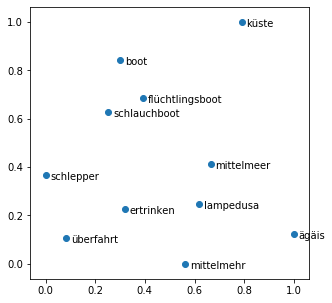

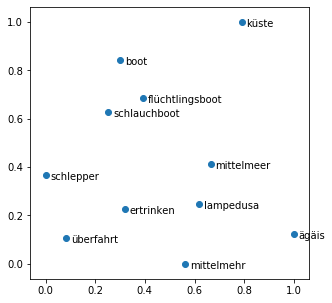

In [27]:
draw_image('mittelmeer', kv)

In [ ]:
bunch.best

In [14]:
bunch.results()

[OrderedDict([('id', 5575),
              ('method', 'svd'),
              ('impl', 'scipy'),
              ('pair_args__window', 10.0),
              ('pair_args__dynamic_window', 'decay'),
              ('pair_args__decay_rate', 0.37500000000000017),
              ('pair_args__delete_oov', 1.0),
              ('pair_args__subsample', 'deter'),
              ('pair_args__subsample_factor', 7.268193383450605e-05),
              ('low_memory', 1.0),
              ('neg', 1.5),
              ('eig', 0.30000000000000004),
              ('dim', 500.0),
              ('micro_results', 0.5820791264949444),
              ('macro_results', 0.6550916007372402),
              ('de_schm280_score', 0.7248024651945882),
              ('de_schm280_oov', 0.05),
              ('de_schm280_fullscore', 0.6885623419348588),
              ('de_gur65_score', 0.7671674810791987),
              ('de_gur65_oov', 0.03076923076923077),
              ('de_gur65_fullscore', 0.7435623278152234),
              ('de